In [ ]:
from dotenv import load_dotenv
import os
from langchain_groq import ChatGroq
load_dotenv()
GROQ_API_KEY=os.environ.get("GROQ_API_KEY")

TRACELOOP_API_KEY= os.environ.get("TRACELOOP_API_KEY")

llm =ChatGroq(model ="llama-3.3-70b-versatile")


In [ ]:
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage, AIMessage, HumanMessage
from langgraph.graph import add_messages

class State(TypedDict):
    messages: Annotated[list[BaseMessage],add_messages]

In [4]:
def ChatBot(state:State):
    #Take user query
    query = state["messages"]
    
    #send to llm

    response = llm.invoke(query)
    #store to the state

    return {"messages":[response]}


In [5]:
from langgraph.graph import StateGraph,START,END
from langgraph.checkpoint.memory import MemorySaver
workflow =StateGraph(State)

#Add the nodes
workflow.add_node("chatbot",ChatBot)
# Add the edges
workflow.add_edge(START,"chatbot")
workflow.add_edge("chatbot",END)
# Compile the graph
memory =MemorySaver()
graph =workflow.compile(checkpointer =memory)

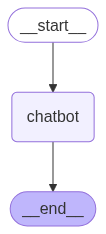

In [6]:
graph

In [6]:
graph.invoke({"messages":"What is AI"})

{'messages': [HumanMessage(content='What is AI', additional_kwargs={}, response_metadata={}, id='8ba49c0d-ff43-4b17-9243-3052d8add792'),
  AIMessage(content="**Artificial Intelligence (AI)** is a broad field of computer science that focuses on creating intelligent machines capable of performing tasks that typically require human intelligence, such as:\n\n1. **Learning**: Acquiring knowledge and improving performance over time.\n2. **Problem-solving**: Finding solutions to complex problems using reasoning, decision-making, and optimization techniques.\n3. **Perception**: Interpreting and understanding data from sensors, such as images, speech, and text.\n4. **Reasoning**: Drawing conclusions and making decisions based on available information.\n\nAI systems can be classified into several types, including:\n\n1. **Narrow or Weak AI**: Designed to perform a specific task, such as facial recognition, language translation, or playing chess.\n2. **General or Strong AI**: Aims to create a mac

In [7]:
message={"messages":[HumanMessage(content="What is AI")]}
result=graph.invoke(message)

In [8]:
print(result["messages"][-1].content)

**Artificial Intelligence (AI)**: Artificial Intelligence refers to the development of computer systems that can perform tasks that typically require human intelligence, such as:

* Learning
* Problem-solving
* Reasoning
* Perception
* Understanding language

AI involves the use of algorithms, statistical models, and computer programs to enable machines to make decisions, classify data, and predict outcomes without being explicitly programmed.

**Key Characteristics of AI:**

1. **Machine Learning**: AI systems can learn from data and improve their performance over time.
2. **Reasoning and Problem-Solving**: AI systems can analyze situations, identify patterns, and make decisions based on that analysis.
3. **Natural Language Processing**: AI systems can understand, interpret, and generate human language.
4. **Computer Vision**: AI systems can interpret and understand visual data from images and videos.

**Types of AI:**

1. **Narrow or Weak AI**: Designed to perform a specific task, su

In [7]:
thread_id ="1"
while True:

    user_message =input("Enter query here...")

    if user_message.strip().lower() in ["exit","bye","break"]:
        break
    config ={"configurable":{"thread_id":thread_id}}
    response =graph.invoke({"messages":[HumanMessage(content=user_message)]},config=config)

    print("AI:",response["messages"][-1].content)

AI: Nice to meet you, Amir Ali! How are you doing today? Is there something I can help you with or would you like to chat?
AI: Your name is Amir Ali.
AI: A profound topic! The concept of existence is a fundamental question that has puzzled philosophers, scientists, and thinkers for centuries.

In a simple sense, to exist means to have being, to be present, or to have reality. It implies that something is real, actual, and not just a product of imagination or a hypothetical concept.

The question of existence can be explored in various ways, including:

1. **Ontology**: The branch of philosophy that deals with the nature of existence, including questions about what exists, how things exist, and the relationships between existing things.
2. **Cosmology**: The study of the origin, evolution, and fate of the universe, which raises questions about the existence of the cosmos and our place within it.
3. **Philosophy of mind**: The study of the nature of consciousness, the mind, and the human

In [ ]:
#Get the final value of the state
state=graph.get_state(config=config)
print(state)

StateSnapshot(values={'messages': [HumanMessage(content='my name is amir ali', additional_kwargs={}, response_metadata={}, id='e8f7f5bf-0789-4070-83cf-3e0cf9cf6692'), AIMessage(content='Nice to meet you, Amir Ali! How are you doing today? Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 41, 'total_tokens': 71, 'completion_time': 0.054894086, 'prompt_time': 0.001814826, 'queue_time': 0.09070331599999999, 'total_time': 0.056708912}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9a8b91ba77', 'finish_reason': 'stop', 'logprobs': None}, id='run--ed681af8-9994-491c-840c-eb8cb5a60513-0', usage_metadata={'input_tokens': 41, 'output_tokens': 30, 'total_tokens': 71}), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='3e9b6e08-b966-4cb1-9c2d-9478d09fa28d'), AIMessage(content='Your name is Amir Ali.', additional_kwargs={}, 

In [ ]:
#Get the intermediate value of the state
list(graph.get_state_history(config))

[StateSnapshot(values={'messages': [HumanMessage(content='my name is amir ali', additional_kwargs={}, response_metadata={}, id='e8f7f5bf-0789-4070-83cf-3e0cf9cf6692'), AIMessage(content='Nice to meet you, Amir Ali! How are you doing today? Is there something I can help you with or would you like to chat?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 41, 'total_tokens': 71, 'completion_time': 0.054894086, 'prompt_time': 0.001814826, 'queue_time': 0.09070331599999999, 'total_time': 0.056708912}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_9a8b91ba77', 'finish_reason': 'stop', 'logprobs': None}, id='run--ed681af8-9994-491c-840c-eb8cb5a60513-0', usage_metadata={'input_tokens': 41, 'output_tokens': 30, 'total_tokens': 71}), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='3e9b6e08-b966-4cb1-9c2d-9478d09fa28d'), AIMessage(content='Your name is Amir Ali.', additional_kwargs={},

In [ ]:
graph.stream()